In [ ]:
"""
This file contains the code used to analyse price across neighbourhoods across a 12 month period.
"""

In [1]:
# library imports
import pandas as pd; import numpy as np; import matplotlib.pyplot as plt; import seaborn as sns;
from scipy.stats import pointbiserialr
%matplotlib inline

In [2]:
# Read in prepared dataset
df = pd.read_csv("../Data/DataPrepQ1.csv", low_memory=False)

In [3]:
# See info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21402 entries, 0 to 21401
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      21402 non-null  int64  
 1   neighbourhood           16854 non-null  object 
 2   neighbourhood_cleansed  21402 non-null  object 
 3   smart_location          21402 non-null  object 
 4   property_type           21402 non-null  object 
 5   room_type               21402 non-null  object 
 6   Side                    21402 non-null  object 
 7   Jan                     21378 non-null  float64
 8   Feb                     21380 non-null  float64
 9   Mar                     21381 non-null  float64
 10  Apr                     21386 non-null  float64
 11  May                     21398 non-null  float64
 12  Jun                     21360 non-null  float64
 13  Jul                     21363 non-null  float64
 14  Aug                     21365 non-null

In [4]:
# View property distribution
df.property_type.value_counts(normalize=True)

Apartment                 0.633959
Serviced apartment        0.067517
House                     0.066956
Boutique hotel            0.048687
Townhouse                 0.028923
Bed and breakfast         0.026586
Aparthotel                0.025278
Hotel                     0.024250
Condominium               0.023876
Loft                      0.017475
Villa                     0.011775
Hostel                    0.006308
Other                     0.003458
Casa particular (Cuba)    0.002710
Tiny house                0.002430
Guesthouse                0.002056
Guest suite               0.001355
Yurt                      0.000748
Earth house               0.000701
Farm stay                 0.000701
Cottage                   0.000561
Boat                      0.000467
Castle                    0.000421
Chalet                    0.000374
Treehouse                 0.000327
Nature lodge              0.000327
Camper/RV                 0.000280
Pension (South Korea)     0.000234
Tent                

In [5]:
# Keep top 8 property types approx. 92% of all listings
prop_types = df.property_type.value_counts(normalize=True)[:8].index.tolist()
df = df.loc[df.property_type.isin(prop_types),:]

In [6]:
# where property type == serviced apartment change to apartment
df.property_type = df.property_type.apply(lambda x: 'Apartment' if x == 'Serviced apartment' else x)

In [7]:
# Find average price of each listing
df['avg_price'] = df.loc[:,'Jan':].mean(axis=1)

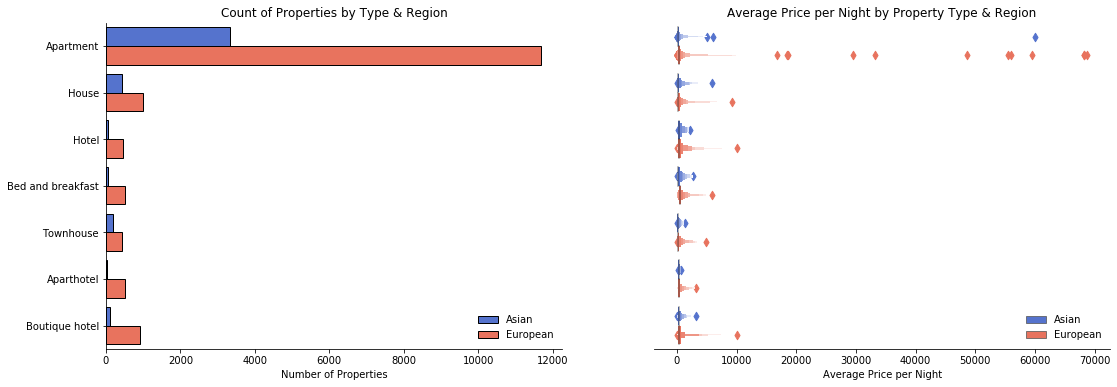

In [8]:
# plot property listings and prices
f, ax = plt.subplots(figsize=(18,6), ncols=2)
ax0 = sns.countplot(y=df.property_type, hue=df.Side, edgecolor='k', palette=['royalblue', 'tomato'], ax=ax[0]);
ax0.set_title("Count of Properties by Type & Region")
ax0.set_xlabel("Number of Properties")
ax0.set_ylabel("")
ax0.legend(frameon=False)

ax1 = sns.boxenplot(x=df.avg_price, y=df.property_type, hue=df.Side, ax=ax[1], palette=['royalblue', 'tomato'], scale='area')
ax1.legend(frameon=False, loc='lower right')
ax1.set_title('Average Price per Night by Property Type & Region')
ax1.set_xlabel("Average Price per Night")
ax1.set_yticks([])
ax1.set_ylabel("")
sns.despine(ax=ax[0]);
sns.despine(ax=ax[1], left=True);
plt.savefig("../Static/q1_countplot_1.png")

In [9]:
# Create features showing difference between max and min prices for listings and s.d.
df['max_min_diff_price'] = df.loc[:, 'Jan':'Dec'].max(axis=1) - df.loc[:, 'Jan':'Dec'].min(axis=1)
df['std_price'] = df.loc[:, 'Jan':'Dec'].std(axis=1)

In [10]:
# Get outlier listings
avg_sd_ppn = df.std_price.mean()
outlier_df = df.loc[df.std_price > avg_sd_ppn].copy()

In [11]:
avg_sd_ppn

43.21093337491486

In [22]:
val_1 = df.loc[df.id == 30361326, 'Jun':'Dec'].mean(axis=1).values
df.loc[df.id == 30361326, 'Jan':'May'] = df.loc[df.id == 30361326, 'Jan':'May'].apply(lambda x: val_1, axis=0)

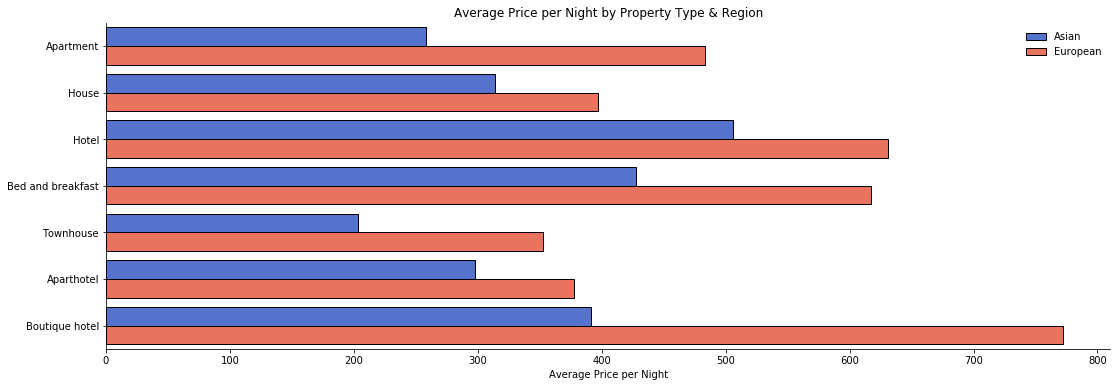

In [31]:
# plot the average price for property types
plt.figure(figsize=(18,6))
sns.barplot(df.avg_price, y=df.property_type, hue=df.Side, ci=None, edgecolor='k', palette=['royalblue', 'tomato']);
plt.legend(frameon=False);
plt.title("Average Price per Night by Property Type & Region");
plt.xlabel("Average Price per Night");
plt.ylabel("");
sns.despine();
plt.savefig("../Static/q1_barplot_1.png");

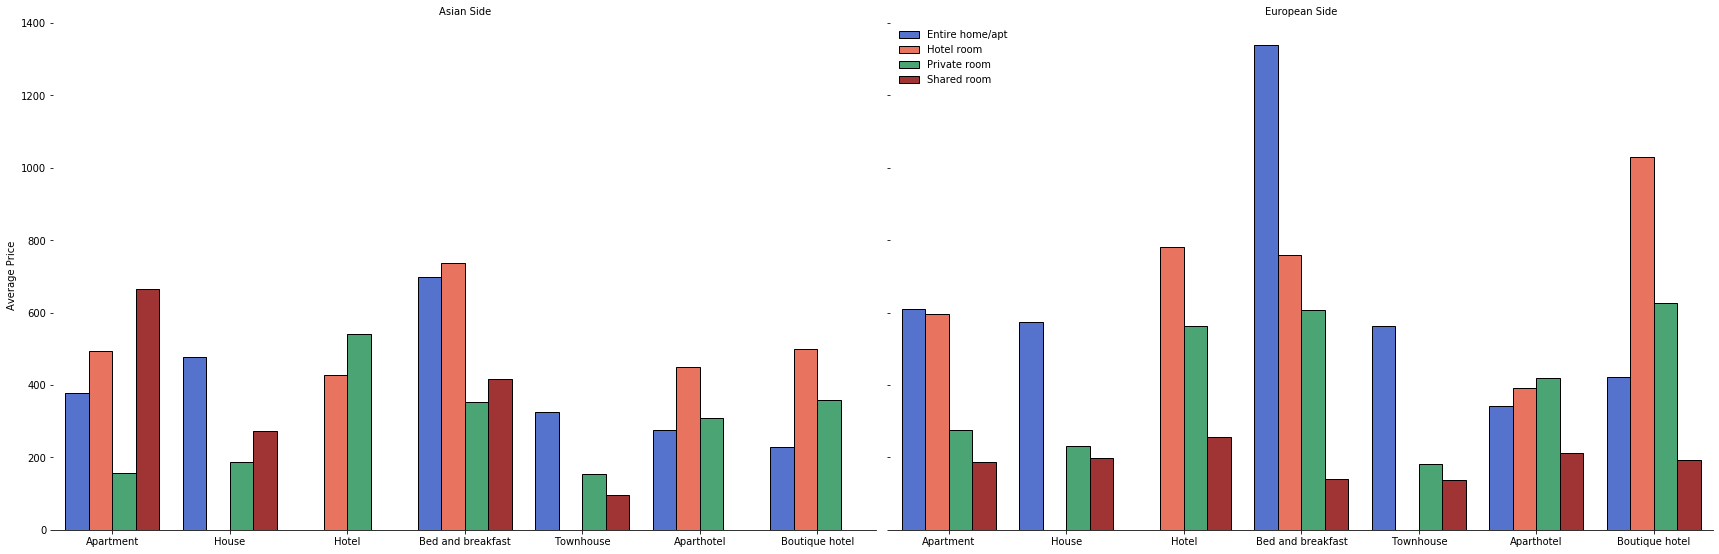

In [33]:
# plot the average price for property and room types
g = sns.catplot(y='avg_price', x='property_type', col='Side', hue='room_type', ci=None, data=df, kind='bar', col_wrap=2, aspect=1.5, height=8, edgecolor='k', legend=False,
               palette=['royalblue', 'tomato', 'mediumseagreen', 'firebrick']);
(g.set_axis_labels("", "Average Price").set_titles("{col_name} {col_var}").despine(left=True));
plt.legend(frameon=False, loc='upper left')
plt.savefig("../Static/q1_catplot_1.png")

In [34]:
# check out the high result
df.loc[(df.property_type == 'Bed and breakfast') & (df.Side == 'European') & (df.room_type == 'Entire home/apt')]

,id,neighbourhood,neighbourhood_cleansed,smart_location,property_type,room_type,Side,Jan,Feb,Mar,...,Jun,Jul,Aug,Sep,Oct,Nov,Dec,avg_price,max_min_diff_price,std_price
813,2234507,Beşiktaş,Besiktas,"Beşiktaş, Turkey",Bed and breakfast,Entire home/apt,European,558.0,558.0,558.0,...,558.0,558.0,558.0,558.0,558.0,558.0,558.0,558.000000,0.000000,0.000000
1167,3410502,Fatih,Fatih,"Istanbul, Turkey",Bed and breakfast,Entire home/apt,European,4848.0,4848.0,4848.0,...,4848.0,4848.0,4848.0,4848.0,4848.0,4848.0,4848.0,4847.967742,0.387097,0.111745
2165,6365965,Beyoglu,Beyoglu,"İstanbul, Turkey",Bed and breakfast,Entire home/apt,European,512.0,512.0,512.0,...,512.0,512.0,512.0,512.0,512.0,512.0,512.0,512.000000,0.000000,0.000000
2171,6379964,Beyoglu,Beyoglu,"İstanbul, Turkey",Bed and breakfast,Entire home/apt,European,478.0,478.0,478.0,...,478.0,478.0,478.0,478.0,478.0,478.0,478.0,478.000000,0.000000,0.000000
3531,11387494,Beşiktaş,Kagithane,"Kağıthane, Turkey",Bed and breakfast,Entire home/apt,European,300.0,300.0,300.0,...,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.000000,0.000000,0.000000


In [35]:
# neighbourhood property listings count
df.groupby('neighbourhood_cleansed').id.nunique().sort_values(ascending=False)

neighbourhood_cleansed
Beyoglu          5686
Sisli            2743
Fatih            2660
Kadikoy          1918
Besiktas         1454
Uskudar           679
Kagithane         543
Esenyurt          487
Atasehir          381
Maltepe           291
Bakirkoy          259
Sariyer           248
Bahcelievler      197
Eyup              176
Kartal            174
Basaksehir        173
Pendik            165
Kucukcekmece      159
Umraniye          155
Avcilar           141
Adalar            116
Bagcilar          109
Sile               88
Beylikduzu         87
Zeytinburnu        84
Tuzla              70
Beykoz             69
Gaziosmanpasa      65
Buyukcekmece       61
Gungoren           59
Arnavutkoy         45
Cekmekoy           40
Sancaktepe         39
Silivri            25
Bayrampasa         25
Esenler            21
Sultanbeyli        19
Sultangazi         19
Catalca             6
Name: id, dtype: int64

In [36]:
# compare most popular european and asian neighbourhoods
asia_euro_df = df.loc[df.neighbourhood_cleansed.isin(['Kadikoy', 'Beyoglu'])].copy()

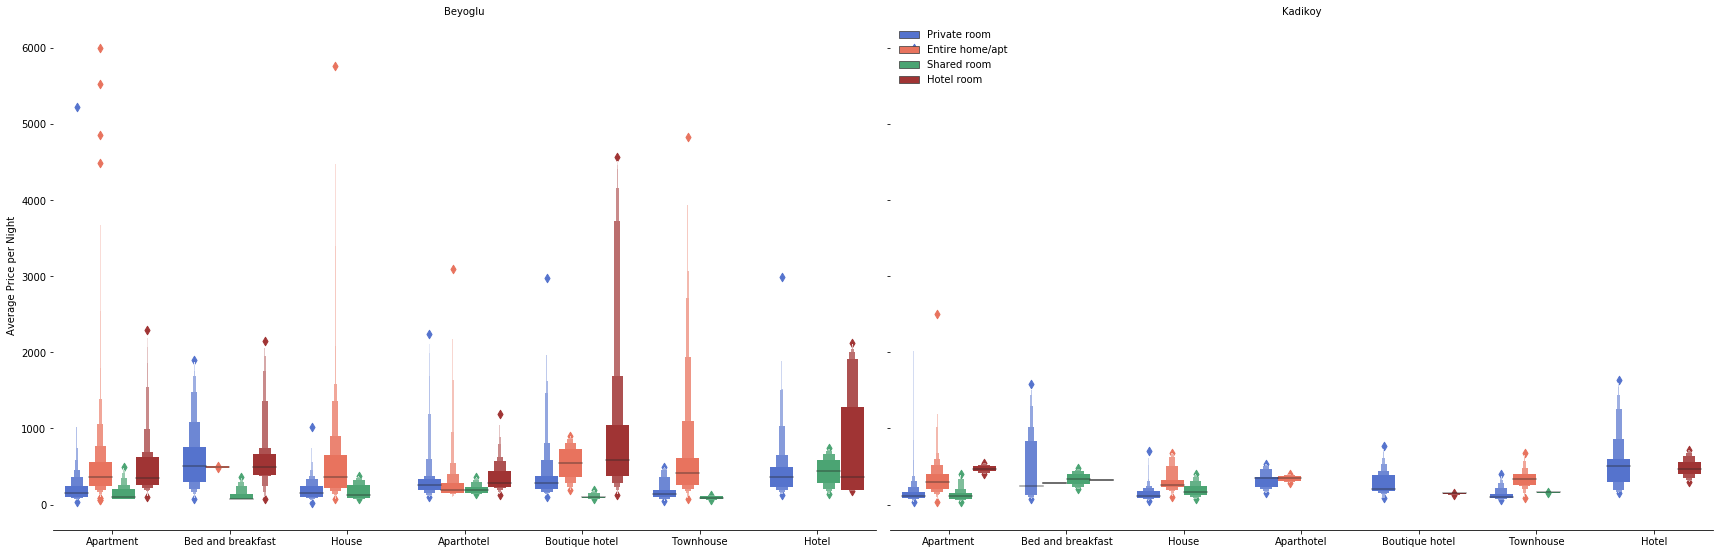

In [53]:
# plot the prices across the two neighbourhoods
g = sns.catplot(y='avg_price', x='property_type', hue='room_type', col='neighbourhood_cleansed', data=asia_euro_df.loc[asia_euro_df.avg_price <= 6000], kind='boxen', aspect=1.5, height=8, legend=False,
               palette=['royalblue', 'tomato', 'mediumseagreen', 'firebrick']);
(g.set_axis_labels("", "Average Price per Night").set_titles("{col_name}").despine(left=True));
plt.legend(frameon=False, loc='upper left');
plt.savefig("../Static/q1_catplot_2.png")

In [38]:
# get correlation between price and side
pointbiserialr(df.Side.factorize()[0], df.avg_price)

PointbiserialrResult(correlation=0.06282335825939203, pvalue=1.010888876310295e-18)

In [39]:
# get correlation between price and side for two neighbourhoods
pointbiserialr(asia_euro_df.Side.factorize()[0], asia_euro_df.avg_price)

PointbiserialrResult(correlation=-0.15452551067308304, pvalue=7.499287264811879e-42)

In [40]:
# Most expensive neighbourhood at different times of year
df_1 = df.groupby('neighbourhood_cleansed').mean().round(2).drop(['id'], axis=1).reset_index()

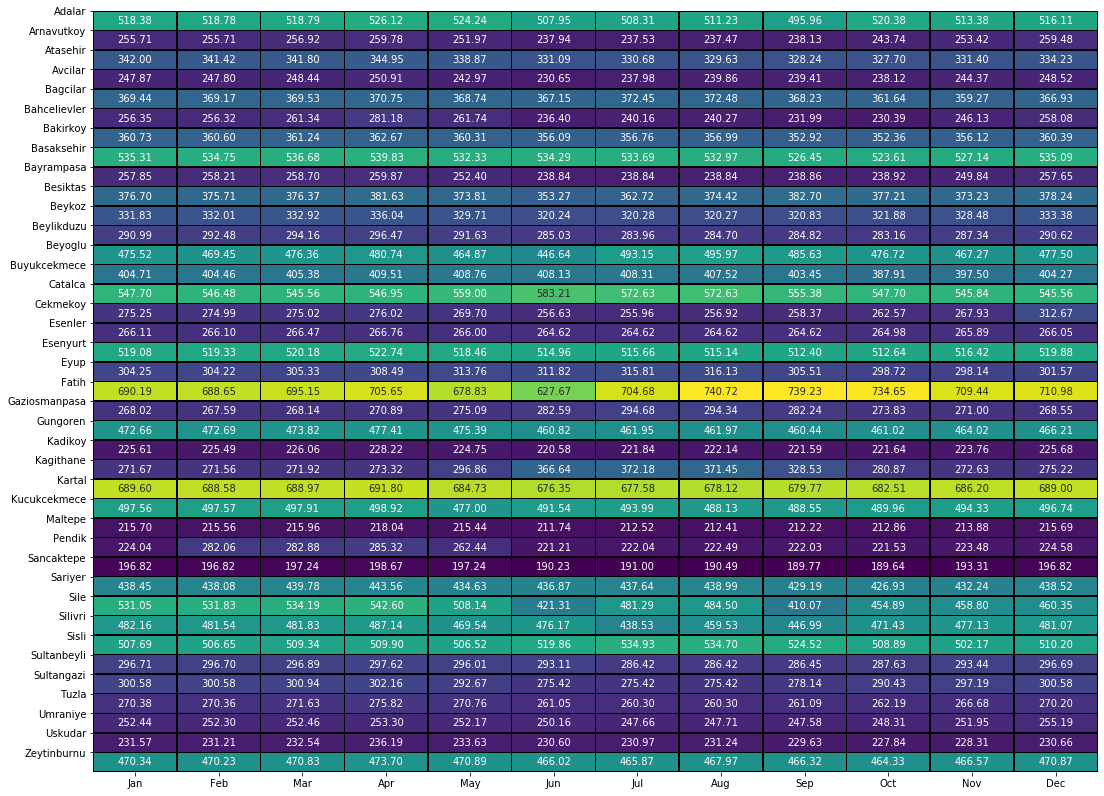

In [41]:
# plot the average price per neighbourhood across the year
plt.figure(figsize=(18,14))
sns.heatmap(df_1.loc[:,'Jan':'Dec'], annot=True, linewidth=.5, cbar=False, cmap='viridis', fmt=".2f", linecolor='k');
plt.yticks(np.arange(39), df_1.neighbourhood_cleansed.values.tolist(), rotation=360);
plt.savefig("../Static/q2_heatmap_1.png")

In [42]:
# list neighbourhoods for each side of the city
asian_hoods = df.loc[df.Side == 'Asian', 'neighbourhood_cleansed'].unique().tolist()
euro_hoods = [i for i in df.neighbourhood_cleansed.unique().tolist() if i not in asian_hoods]

In [43]:
# filter on neighbourhoods
asian_df_1 = df_1.loc[df_1.neighbourhood_cleansed.isin(asian_hoods)].copy()
euro_df_1 = df_1.loc[df_1.neighbourhood_cleansed.isin(euro_hoods)].copy()

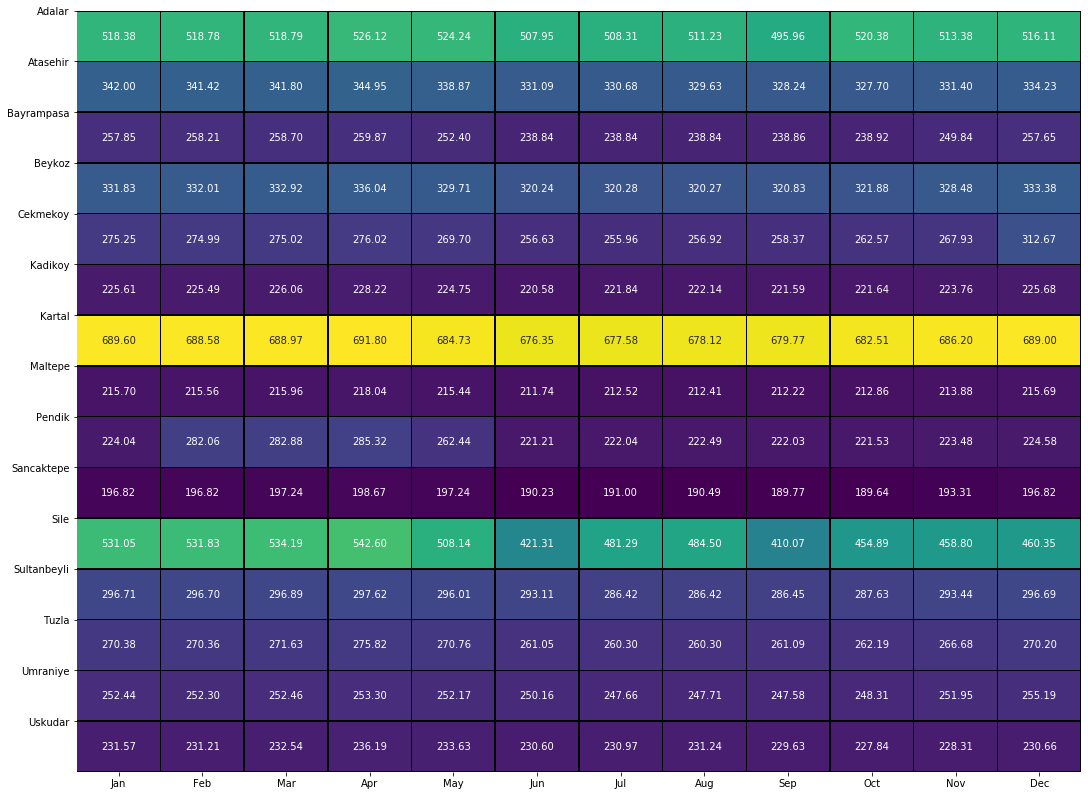

In [44]:
# asian neighbourhoods
plt.figure(figsize=(18,14))
sns.heatmap(asian_df_1.loc[:,'Jan':'Dec'], annot=True, linewidth=.5, cbar=False, cmap='viridis', fmt=".2f", linecolor='k');
plt.yticks(np.arange(len(asian_hoods)), asian_df_1.neighbourhood_cleansed.values.tolist(), rotation=360);
plt.savefig("../Static/q2_heatmap_2.png")

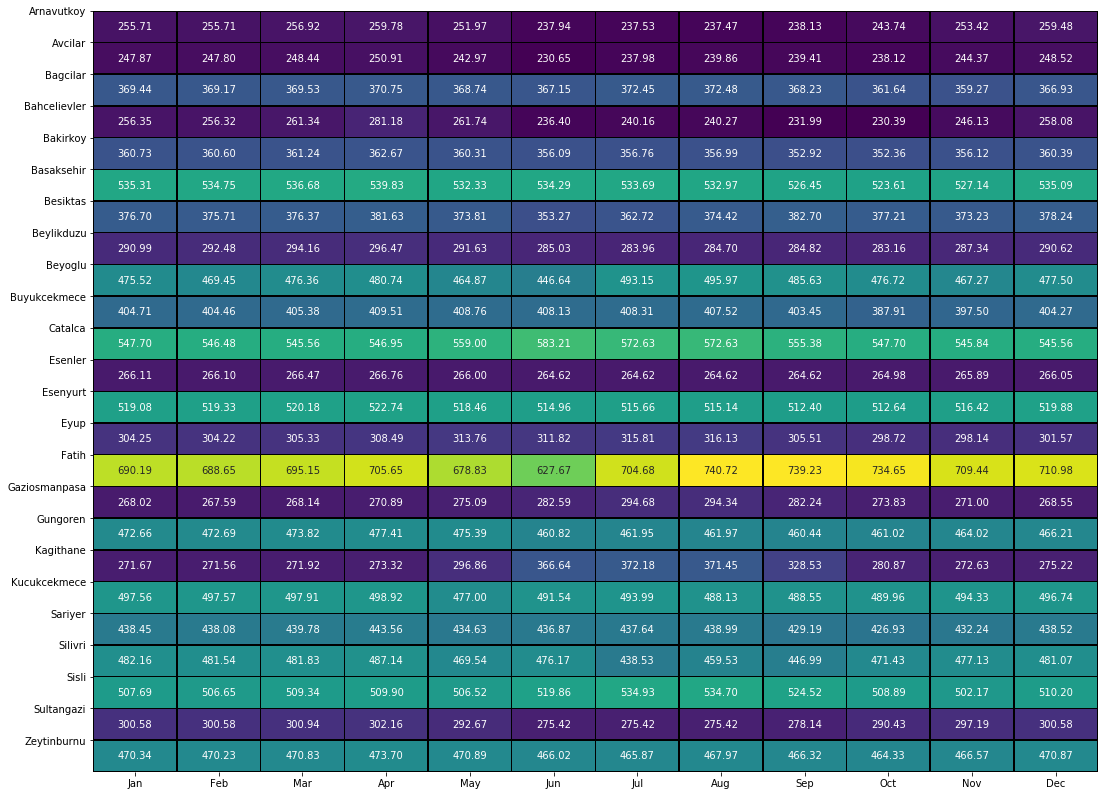

In [45]:
# european neighbourhoods
plt.figure(figsize=(18,14))
sns.heatmap(euro_df_1.loc[:,'Jan':'Dec'], annot=True, linewidth=.5, cbar=False, cmap='viridis', fmt=".2f", linecolor='k');
plt.yticks(np.arange(len(euro_hoods)), euro_df_1.neighbourhood_cleansed.values.tolist(), rotation=360);
plt.savefig("../Static/q2_heatmap_3.png")

In [46]:
# create new variable which is a copy of Dec column so that it can be used to get the average price change of Jan
df_2 = df_1.copy()
df_2['_Dec'] = df_2.Dec

In [47]:
# Change ordering of columns
cols = df_2.loc[:, 'Jan':'_Dec'].columns.tolist()
cols = cols[-1:] + cols[:-1]
df_2 = df_2[cols]

In [48]:
# Structure dataset to show price changes
df_2 = df_2.diff(axis=1)
df_2.drop(['_Dec'], axis=1, inplace=True)
df_2['neighbourhood_cleansed'] = df_1.neighbourhood_cleansed
cols = df_2.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_2 = df_2[cols]

In [51]:
df_2

,neighbourhood_cleansed,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,avg_price,max_min_diff_price,std_price
0,Adalar,2.27,0.40,0.01,7.33,-1.88,-16.29,0.36,2.92,-15.27,24.42,-7.00,2.73,-1.14,-411.73,-60.50
1,Arnavutkoy,-3.77,0.00,1.21,2.86,-7.81,-14.03,-0.41,-0.06,0.66,5.61,9.68,6.06,-10.50,-217.54,-17.75
2,Atasehir,7.77,-0.58,0.38,3.15,-6.08,-7.78,-0.41,-1.05,-1.39,-0.54,3.70,2.83,0.94,-306.47,-16.70
3,Avcilar,-0.65,-0.07,0.64,2.47,-7.94,-12.32,7.33,1.88,-0.45,-1.29,6.25,4.15,-5.44,-217.22,-16.19
4,Bagcilar,2.51,-0.27,0.36,1.22,-2.01,-1.59,5.30,0.03,-4.25,-6.59,-2.37,7.66,1.05,-328.95,-24.52
5,Bahcelievler,-1.73,-0.03,5.02,19.84,-19.44,-25.34,3.76,0.11,-8.28,-1.60,15.74,11.95,-8.05,-180.13,-45.15
6,Bakirkoy,0.34,-0.13,0.64,1.43,-2.36,-4.22,0.67,0.23,-4.07,-0.56,3.76,4.27,-2.29,-331.20,-15.66
7,Basaksehir,0.22,-0.56,1.93,3.15,-7.50,1.96,-0.60,-0.72,-6.52,-2.84,3.53,7.95,-2.41,-484.85,-28.81
8,Bayrampasa,0.20,0.36,0.49,1.17,-7.47,-13.56,0.00,0.00,0.02,0.06,10.92,7.81,-8.58,-228.02,-11.53
9,Besiktas,-1.54,-0.99,0.66,5.26,-7.82,-20.54,9.45,11.70,8.28,-5.49,-3.98,5.01,-4.23,-305.97,-43.15


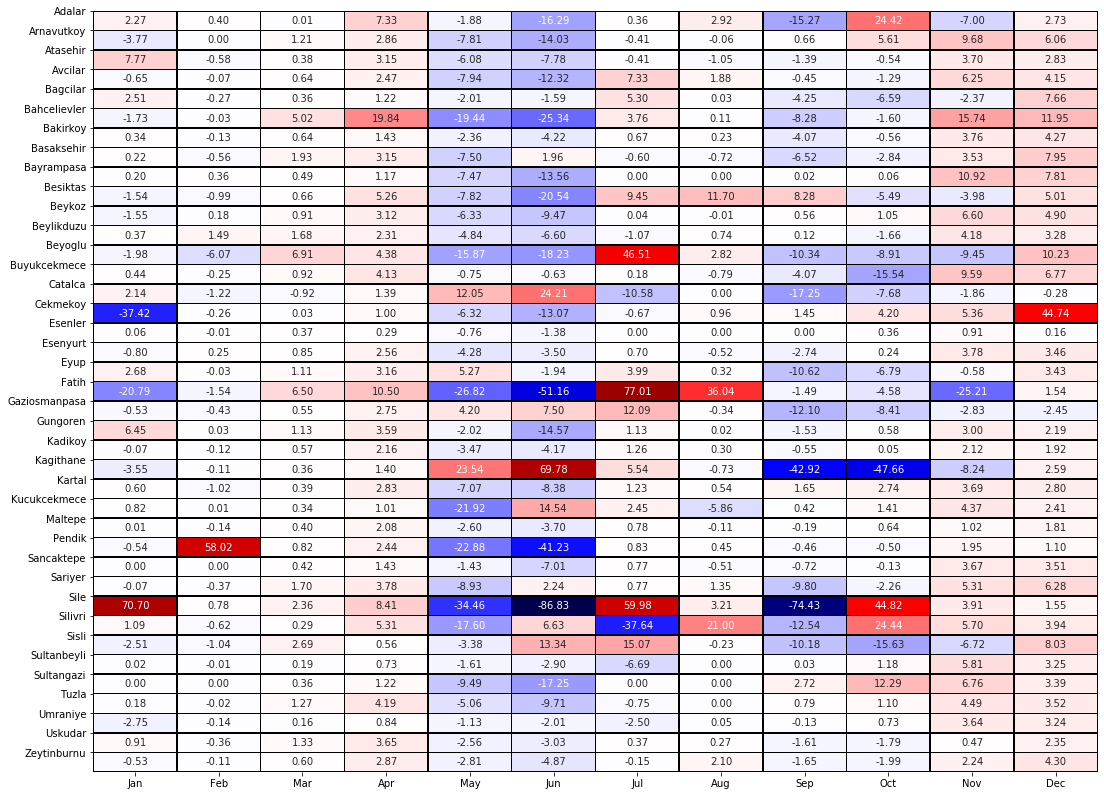

In [49]:
# plot the average change in price
plt.figure(figsize=(18,14))
sns.heatmap(df_2.loc[:,'Jan':'Dec'], annot=True, linewidth=.5, cbar=False, center=0, cmap='seismic', fmt=".2f", linecolor='k');
plt.yticks(np.arange(39), df_2.neighbourhood_cleansed.values.tolist(), rotation=360);
plt.savefig("../Static/q2_heatmap_4.png")

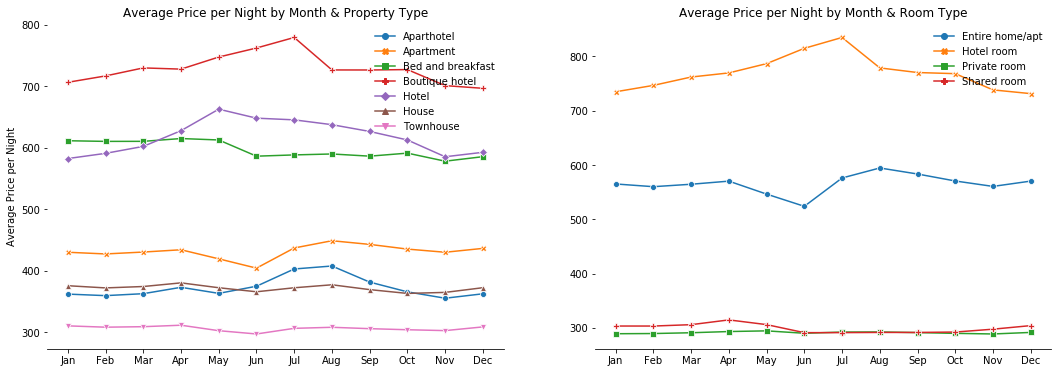

In [52]:
# plot price change based on property type and room type
df_3 = df.groupby('property_type').mean().round(2).drop(['id'], axis=1)
df_4 = df.groupby('room_type').mean().round(2).drop(['id'], axis=1)
f, ax = plt.subplots(figsize=(18,6), ncols=2)
ax0 = sns.lineplot(data=df_3.loc[:,'Jan':'Dec'].T, dashes=False, markers=True, sort=False, ax=ax[0]);
ax0.legend(frameon=False, loc='best')
ax0.set_title("Average Price per Night by Month & Property Type")
ax0.set_ylabel("Average Price per Night")
ax1 = sns.lineplot(data=df_4.loc[:,'Jan':'Dec'].T, dashes=False, markers=True, sort=False, ax=ax[1])
ax1.set_title("Average Price per Night by Month & Room Type")
ax1.legend(frameon=False, loc='best')
sns.despine(left=True);
plt.savefig("../Static/q2_lineplot_1.png")